# COVID-19 Data Analysis: Exploring Trends, Vaccination Impact, and Insights Through Visualizations

The COVID-19 pandemic, caused by the SARS-CoV-2 virus, has significantly impacted global health, economies, and daily life. Since its emergence in late 2019, vast amounts of data have been collected on infection rates, mortality, vaccination efforts, and testing strategies. Analyzing this data is crucial for understanding the spread of the virus, identifying trends, and making informed policy decisions. This project involves basic data cleaning, exploratory data analysis (EDA), and visualization to uncover insights into COVID-19 cases, deaths, and vaccinations over time.

## About the Dataset

The **[dataset](https://drive.google.com/file/d/1syeD6Ni_ZlfXHHH0Jp6ALpvg9iCAEk_-/view?usp=sharing)** used for this project contains essential COVID-19 metrics, tracking the progression of the pandemic across different countries. The dataset consists of the following columns:

- DATE: The recorded date of COVID-19 data entry.
- country: The country or region where the cases, deaths, and vaccinations were reported.
- NEW Cases: The number of newly confirmed COVID-19 cases reported on a given date.
- NEW_DEATHS: The number of new deaths attributed to COVID-19 on that specific date.
- vaccinated: The number of people who have received at least one dose of the COVID-19 vaccine.

This dataset may require cleaning and preprocessing to handle missing values, incorrect formats, and inconsistencies before conducting meaningful analysis.

## Objective

The primary goal of this mini-project is to clean, analyze, and visualize COVID-19 data to identify trends, patterns, and key insights. The specific objectives include:

- Perform Data Cleaning: Handle missing values, standardize date formats, and filter out inconsistencies.
- Explore Trends in COVID-19 Cases and Deaths:
  - Analyze daily and cumulative trends in infections and fatalities.
  - Compare case and death rates across different countries and regions.
- Create Data Visualizations:
  - Line Plots: Show the trend of cases, deaths, and vaccinations over time.
  - Bar Charts: Compare cases, deaths, and vaccinations by country.
  - Scatter Plots: Explore relationships between infection rates and testing or vaccination rates.

#### Lets import the necessay libriaries

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Lets now import the dataset and show some few lines of the dataset

In [61]:
df = pd.read_csv(r"module_4/Data/MiniProjectDataset.csv")
df.head()

,DATE,country,NEW Cases,NEW_DEATHS,vaccinated
0,2024-11-01,Argentina,NaN,NaN,unknown
1,2024-11-01,Australia,0.0,0.0,327
2,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,unknown


## DATA CLEANING

In [62]:
df.shape #this shows the shape of the dataset

(165, 5)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         165 non-null    object 
 1   country      165 non-null    object 
 2    NEW Cases   154 non-null    float64
 3   NEW_DEATHS   139 non-null    float64
 4   vaccinated   165 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.6+ KB


lets first, rename the columns then standardize the date format on the date column

In [64]:
print(df.columns.tolist()) # to list the different columns names

['DATE ', 'country ', ' NEW Cases', 'NEW_DEATHS', 'vaccinated ']


In [65]:
# Rename columns explicitly to avoid KeyError
df.rename(columns={
    'DATE ': 'date',
    'country ': 'country',
    ' NEW Cases': 'new_cases',
    'NEW_DEATHS': 'new_deaths',
    'vaccinated ': 'vaccinated'
}, inplace=True)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        165 non-null    object 
 1   country     165 non-null    object 
 2   new_cases   154 non-null    float64
 3   new_deaths  139 non-null    float64
 4   vaccinated  165 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.6+ KB


In [67]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        150 non-null    datetime64[ns]
 1   country     165 non-null    object        
 2   new_cases   154 non-null    float64       
 3   new_deaths  139 non-null    float64       
 4   vaccinated  165 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 6.6+ KB


lets now check for mising values

In [69]:
df.isnull().sum()

date          15
country        0
new_cases     11
new_deaths    26
vaccinated     0
dtype: int64

The date, new_cases and new_deaths columns has mising values, we will have to look for the percentage of the missing values then before deciding on how to treat them

In [70]:
# Check percentage of missing values in key columns
missing_percent = df[['date', 'new_cases', 'new_deaths']].isnull().mean() * 100
print("Percentage of missing values:\n", missing_percent)

Percentage of missing values:
 date           9.090909
new_cases      6.666667
new_deaths    15.757576
dtype: float64


Based on the percentages, I
1. date (9%) → Essential column. Drop rows with missing dates.
2. new_cases (6.7%) → Moderate. Fill missing with 0 (assumes no report = no cases).
3. new_deaths (15.8%) → High. Use 0 if you assume unreported = none, or drop if uncertain.

In [71]:
# Drop rows with missing dates (essential for time series)
df = df.dropna(subset=['date'])

# Fill missing new_cases and new_deaths with 0
df['new_cases'] = df['new_cases'].fillna(0)
df['new_deaths'] = df['new_deaths'].fillna(0)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        150 non-null    datetime64[ns]
 1   country     150 non-null    object        
 2   new_cases   150 non-null    float64       
 3   new_deaths  150 non-null    float64       
 4   vaccinated  150 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 7.0+ KB


## Analyze Daily and Cumulative Trends

In [73]:
# Convert infinite values to NaN
df = df.replace([float('inf'), -float('inf')], pd.NA)

# Drop or fill NaNs if needed
df = df.dropna(subset=['new_cases', 'new_deaths'])

# Also do it for the grouped dataframe (e.g., daily_trend)
daily_trend.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
daily_trend.dropna(subset=['new_cases', 'new_deaths'], inplace=True)


In [74]:
#lets first of all group by the date column to analyze global daily trends
daily_tred = df.groupby('date')[['new_cases', 'new_deaths']].sum().reset_index()
daily_tred

,date,new_cases,new_deaths
0,2024-11-01,2181.0,107.0
1,2024-11-02,1199.0,58.0
2,2024-11-03,1798.0,56.0
3,2024-11-04,3262.0,160.0
4,2024-11-05,1833.0,76.0
5,2024-11-06,1373.0,59.0
6,2024-11-07,1419.0,70.0
7,2024-11-08,2351.0,105.0
8,2024-11-09,2735.0,134.0
9,2024-11-10,1125.0,54.0


In [75]:
#lets add cumulative frequency to the data
daily_trend['cum_cases'] = daily_trend['new_cases'].cumsum()
daily_trend['cum_deaths'] = daily_trend['new_deaths'].cumsum()
daily_trend.head()

,date,new_cases,new_deaths,cum_cases,cum_deaths
0,2024-11-01,2181.0,107.0,2181.0,107.0
1,2024-11-02,1199.0,58.0,3380.0,165.0
2,2024-11-03,1798.0,56.0,5178.0,221.0
3,2024-11-04,3262.0,160.0,8440.0,381.0
4,2024-11-05,1833.0,76.0,10273.0,457.0


In [78]:
import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na option is deprecated.*")


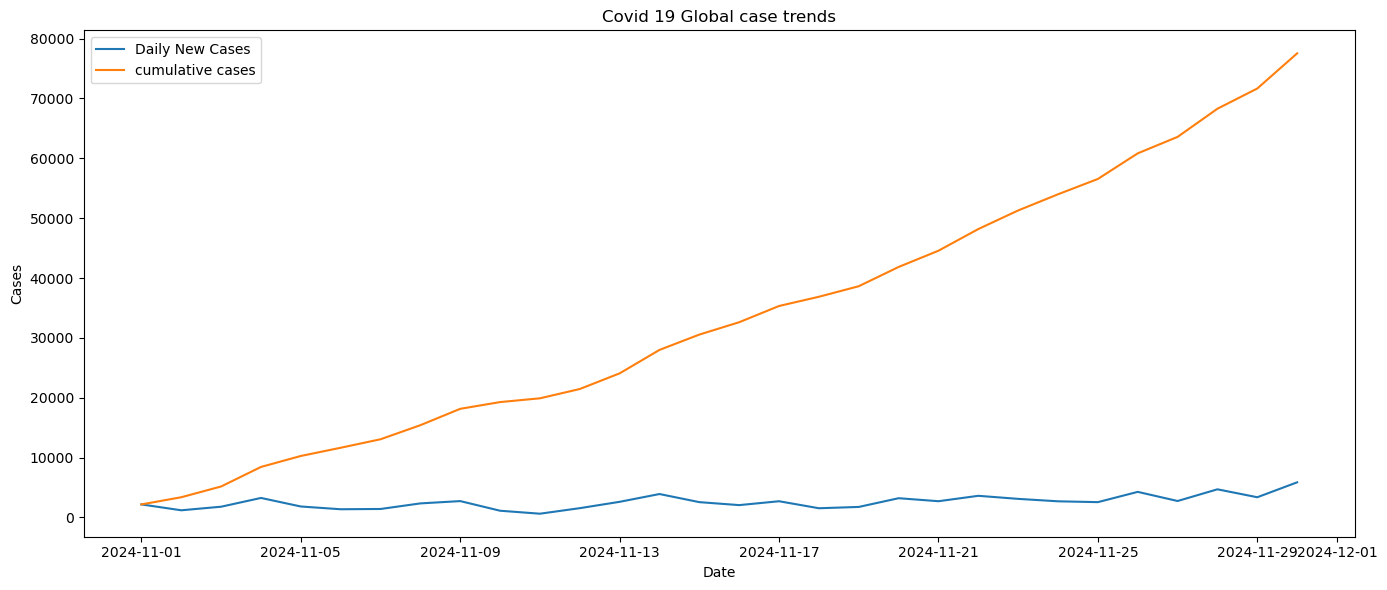

In [79]:
# lets plot daily vs the cumuative trends
plt.figure(figsize= (14,6))
sns.lineplot(x='date', y='new_cases', data = daily_trend, label = 'Daily New Cases')
sns.lineplot(x='date', y='cum_cases', data= daily_trend, label='cumulative cases')
plt.title("Covid 19 Global case trends")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.tight_layout()
plt.show()          

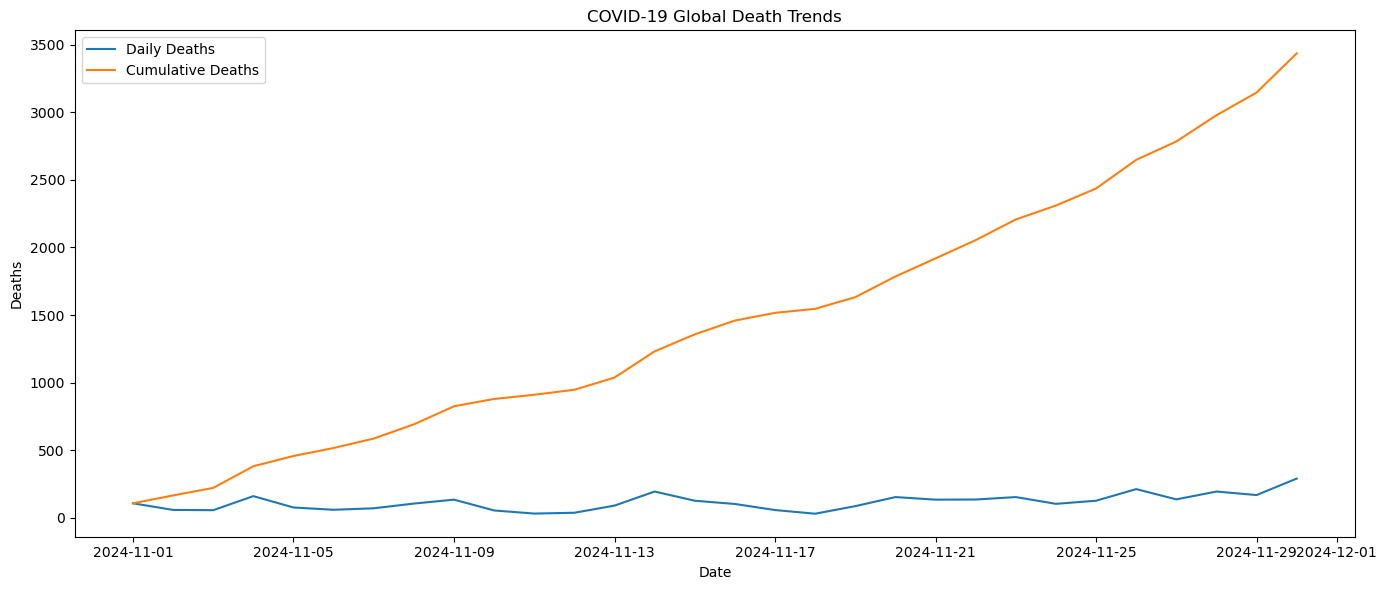

In [81]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='new_deaths', data=daily_trend, label='Daily Deaths')
sns.lineplot(x='date', y='cum_deaths', data=daily_trend, label='Cumulative Deaths')
plt.title('COVID-19 Global Death Trends')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.tight_layout()
plt.show()

## Line Plots – Trend of Cases, Deaths, and Vaccinations Over Time

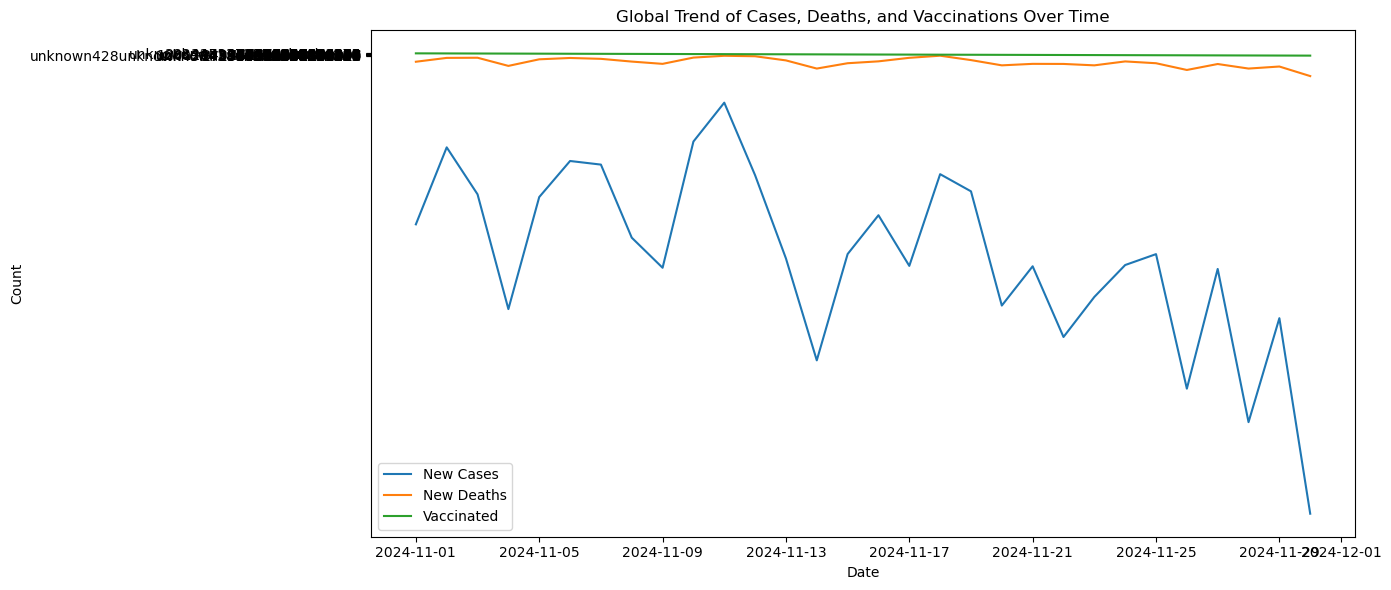

In [82]:
# Group by date to get global trend
daily_viz = df.groupby('date')[['new_cases', 'new_deaths', 'vaccinated']].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_viz, x='date', y='new_cases', label='New Cases')
sns.lineplot(data=daily_viz, x='date', y='new_deaths', label='New Deaths')
sns.lineplot(data=daily_viz, x='date', y='vaccinated', label='Vaccinated')
plt.title('Global Trend of Cases, Deaths, and Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


## Bar Charts – Compare by Country

In [85]:
# Group by country
country_viz = df.groupby('country')[['new_cases', 'new_deaths', 'vaccinated']].sum().reset_index()
# Top 10 countries by new cases
top_countries = country_viz.sort_values('new_cases', ascending=False).head(10)


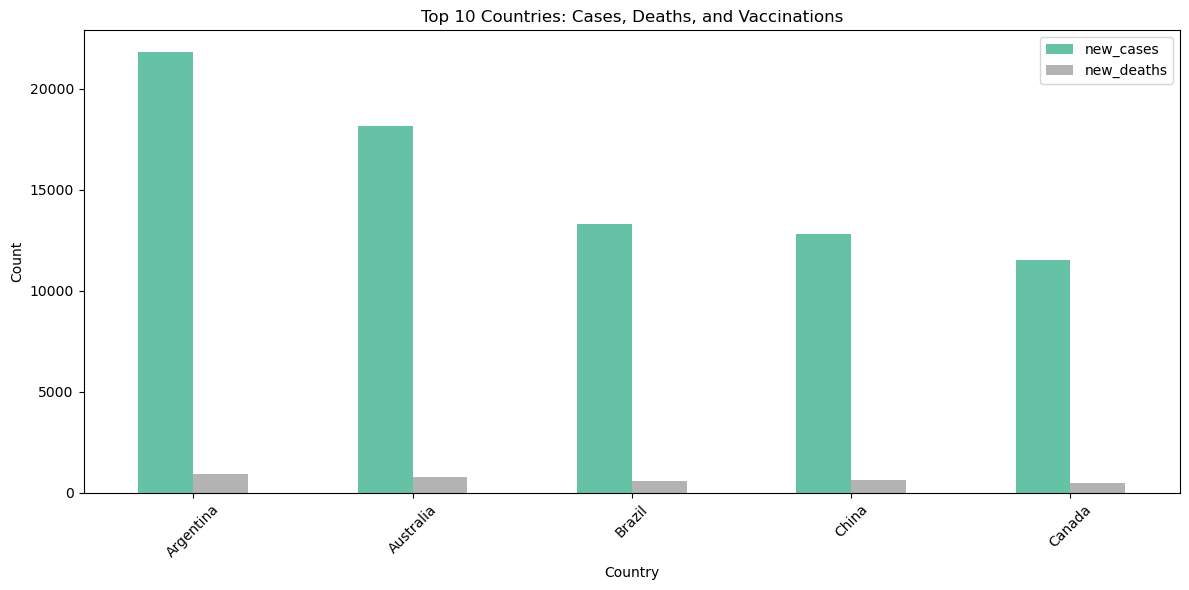

In [86]:

# Plot
top_countries.set_index('country')[['new_cases', 'new_deaths', 'vaccinated']].plot(
    kind='bar', figsize=(12, 6), colormap='Set2'
)
plt.title('Top 10 Countries: Cases, Deaths, and Vaccinations')
plt.ylabel('Count')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Scatter Plot – Vaccination vs. Infection

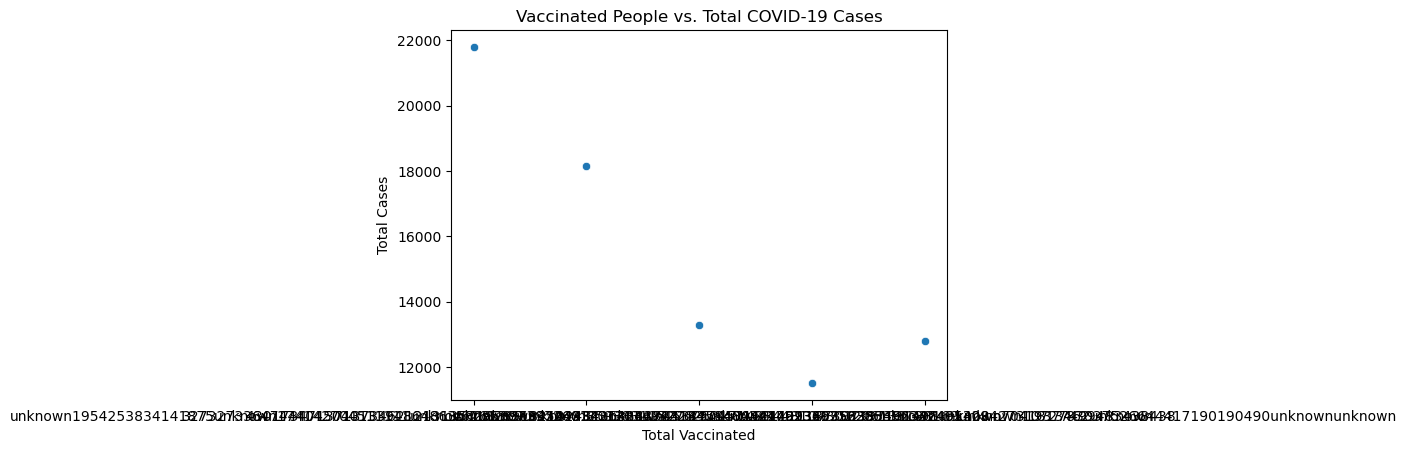

In [90]:
# Use grouped data by country
scatter_df = df.groupby('country')[['new_cases', 'vaccinated']].sum().reset_index()

# Plot
sns.scatterplot(data=scatter_df, x='vaccinated', y='new_cases')
plt.title('Vaccinated People vs. Total COVID-19 Cases')
plt.xlabel('Total Vaccinated')
plt.ylabel('Total Cases')
plt.show()
